In [1]:
#安裝套件
!pip install requests
!pip install feedparser
!pip install lxml
!pip install jieba
!pip install wordcloud

#下載辭典檔
!wgt https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O /dict.txt.big
 

  Using cached feedparser-6.0.2-py3-none-any.whl (80 kB)
  Using cached sgmllib3k-1.0.0-py3-none-any.whl
  Using cached jieba-0.42.1-py3-none-any.whl


'wgt' 不是內部或外部命令、可執行的程式或批次檔。


In [55]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time

import random

In [2]:
#指定辭典檔
jieba.set_dictionary('./mydict/dict.txt.big')
#加入自定義辭典
jieba.load_userdict('./mydict/mydict.txt')


Building prefix dict from C:\Users\leavi\Desktop\catcher_nlp\mydict\dict.txt.big ...
Loading model from cache C:\Users\leavi\AppData\Local\Temp\jieba.ue81af2ce4832b1549caa38b1b6fa9b38.cache
Loading model cost 1.033 seconds.
Prefix dict has been built successfully.


In [3]:
# 開檔
fileAllLines = []
with open('./file/Depressed_all.txt','r',encoding="utf-8") as fileLine:
    for line in iter(lambda: fileLine.read(1024), ''):
        #print(line)
        fileAllLines.append(line)
        
new_line = ' '.join(fileAllLines)
#new_line

In [4]:
#進行一次分詞測試
#seg_words_list = jieba.lcut(new_line)
#seg_words_list

In [5]:
#加入stop word
with open(file='./mydict/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
    
stop_words.append('\n')  ## 文章中有許多分行符號，這邊加入停用字中，可以把它拿掉
stop_words.append('\n\n')
#stop_words #查看停止字是否都有剔除

In [6]:
#進行匯入停止字的分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(new_line)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['第一次',
 '發文',
 '手機',
 '排版',
 '請見',
 '諒',
 '患有',
 '憂鬱症',
 '存在',
 '感到',
 '餘',
 '不知道',
 '活著',
 '意義',
 '每天',
 '行屍走肉',
 '活著',
 '不斷',
 '嘲笑',
 '發音',
 '問題',
 '長大',
 '嘲笑',
 '長相',
 '我',
 '想',
 '就此結束',
 '站',
 '陽台',
 '吹',
 '吹風',
 '不行',
 '認為',
 '想',
 '跳下去',
 '抓',
 '回來',
 '我',
 '打算',
 '站',
 '陽台',
 '圍牆',
 '想',
 '我',
 '跳下去',
 '是否',
 '死',
 '想到',
 '會嚇',
 '作罷',
 '我想',
 '吞藥來',
 '結束',
 '我',
 '心態',
 '扭曲',
 '我',
 '造成',
 '可逆',
 '心理',
 '傷害',
 '我',
 '憂鬱症',
 '恐慌',
 '症',
 '焦慮症',
 '吃藥',
 '治療',
 '發病',
 '痛苦',
 '我',
 '不敢相信',
 '能夠',
 '痊癒',
 '一天',
 '根本',
 '不該',
 '資格',
 '存在',
 '世界',
 '從良',
 '改變',
 '資格',
 '改變',
 '傷害',
 '過的',
 '心中',
 '留著',
 '無法',
 '抹滅',
 '傷痕',
 '記得',
 '那段',
 '傷害',
 '記憶',
 '五六年',
 '我',
 '樂觀',
 '開朗',
 '三生',
 '憂鬱',
 '躁鬱',
 '思覺',
 '失調',
 '我',
 '佔',
 '上邊',
 '過去',
 '我',
 '霸凌',
 '撐',
 '過來',
 '可怕',
 '大三',
 '那次',
 '性侵',
 '生病',
 '我',
 '病識感',
 '掉淚',
 '想',
 '自殺',
 '耳邊',
 '聲音',
 '聲音',
 '我',
 '當作',
 '一定',
 '太累',
 '某天',
 '我',
 '宿營',
 '發作',
 '朋友',
 '形容',
 '根本',
 '鬼',
 '上身',
 '課堂',
 '對著',
 '聲音',
 '大吼大叫',
 '漸漸',
 '系都當',
 

In [74]:
#載入繪圖相關的library
from PIL import Image 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())
mask=np.array(Image.open(r'think2.jpg'))

C:\Users\leavi\anaconda3\envs\catcher_nlp\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [75]:
#安裝中文字型
#!ls fonts/*.ttf 這裡的字型是文字雲跑出來的字型，可手動下載或不安裝

In [76]:
#準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

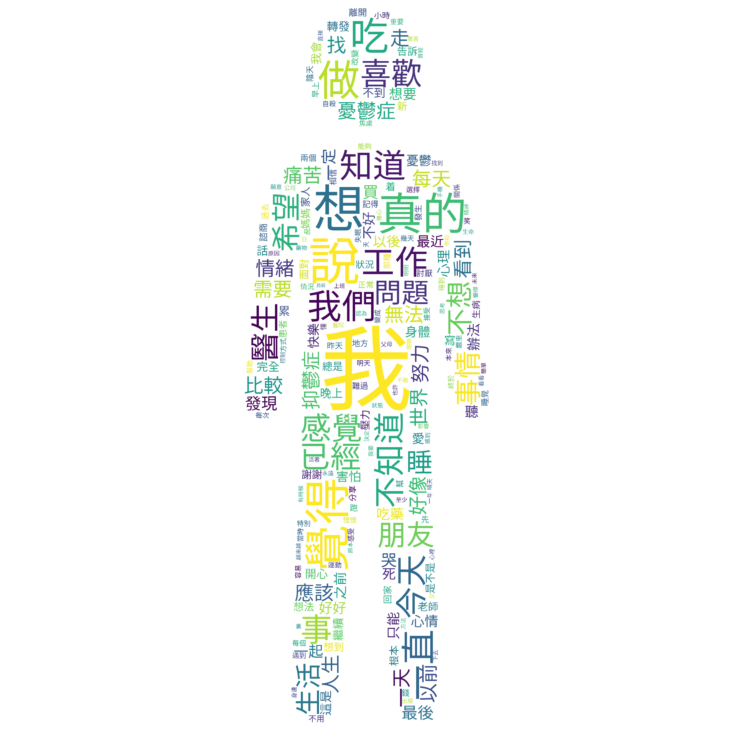

In [78]:
#用有處理stop words的斷詞跑文字雲
wordcloud = WordCloud(scale=4,mask=mask,font_path='./font/TaipeiSansTCBeta-Regular.ttf',background_color='white',width=2400,height=2400,margin=2,collocations=False).generate_from_frequencies(seg_stop_counter)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [38]:
#用dataframe處理數據
seg_df = pd.DataFrame(seg_stop_words_list, columns=['seg_word'])
seg_df

,seg_word
0,第一次
1,發文
2,手機
3,排版
4,請見
...,...
1187080,日
1187081,終是
1187082,一人度
1187083,春秋


In [39]:
#進行排序，查看詞頻最高的前20個詞
seg_df['count'] = 1
seg_freq_df = seg_df.groupby('seg_word').sum()
#seg_freq_df
print(seg_freq_df.sort_values(by=['count'],ascending=False).head(20))

          count
seg_word       
我         92767
說          9468
想          9387
覺得         7746
真的         7003
做          6260
吃          5414
一直         4426
我們         4181
工作         4038
知道         3985
不知道        3743
今天         3646
事          3610
喜歡         3272
感覺         3267
已經         3237
醫生         3079
希望         2976
朋友         2854


In [40]:
#存成csv檔
df_seg=seg_freq_df.sort_values(by=['count'],ascending=False)
df_seg.to_csv('frequencyDepressed.csv',index=1)